<a href="https://colab.research.google.com/github/raghzzzspace/Pima-Indians-Diabetes-Database/blob/main/Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6214 - loss: 0.6530 - val_accuracy: 0.5645 - val_loss: 0.6557
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6612 - loss: 0.5774 - val_accuracy: 0.5806 - val_loss: 0.6224
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6782 - loss: 0.5527 - val_accuracy: 0.6290 - val_loss: 0.5940
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7397 - loss: 0.5070 - val_accuracy: 0.6290 - val_loss: 0.5760
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7329 - loss: 0.5026 - val_accuracy: 0.6452 - val_loss: 0.5611
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7451 - loss: 0.4991 - val_accuracy: 0.6774 - val_loss: 0.5522
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7553 - loss: 0.4820 - val_accuracy: 0.6935 - val_loss: 0.5437
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.4713 - val_accuracy: 0.6774 - val_loss: 0.5

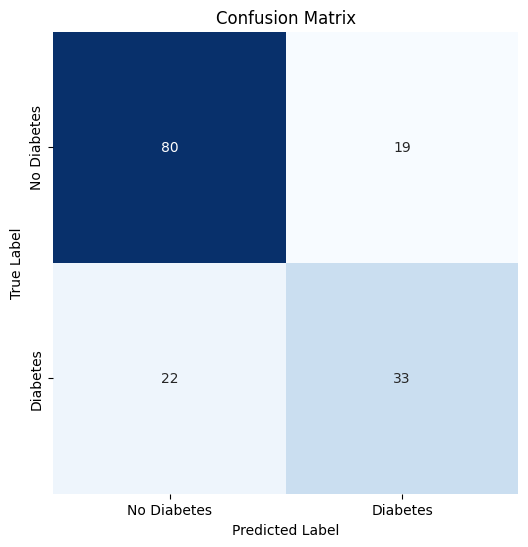

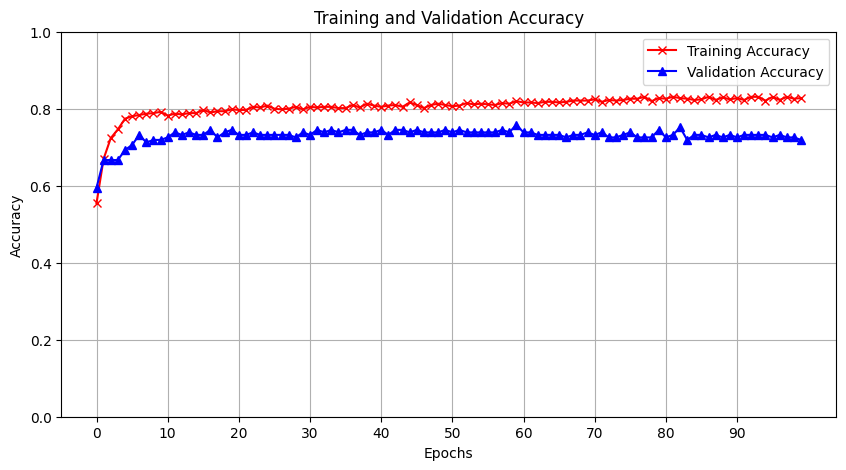

In [ ]:
# Install necessary packages if not already installed
# pip install pandas numpy scikit-learn tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Preprocess the data
# Separate features and target variable
X = data.drop('Outcome', axis=1).values  # Features
y = data['Outcome'].values                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network model
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
    layers.Dense(8, activation='relu'),                                     # Hidden layer 2
    layers.Dense(1, activation='sigmoid')                                   # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 6: Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 7: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Step 8: Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 9: Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='x',color="red")
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='^',color="blue")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 100, step=10))  # Adjust x-ticks based on the number of epochs
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.grid()
plt.show()


Test Accuracy: 72.08%
Confusion Matrix:
[[77 22]
 [21 34]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.79      0.78      0.78        99
    Diabetes       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



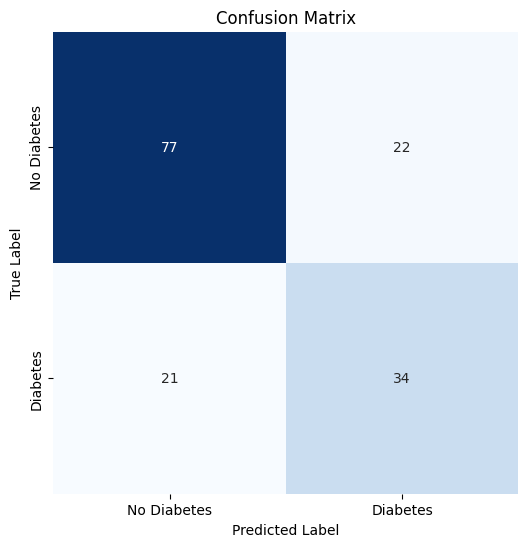

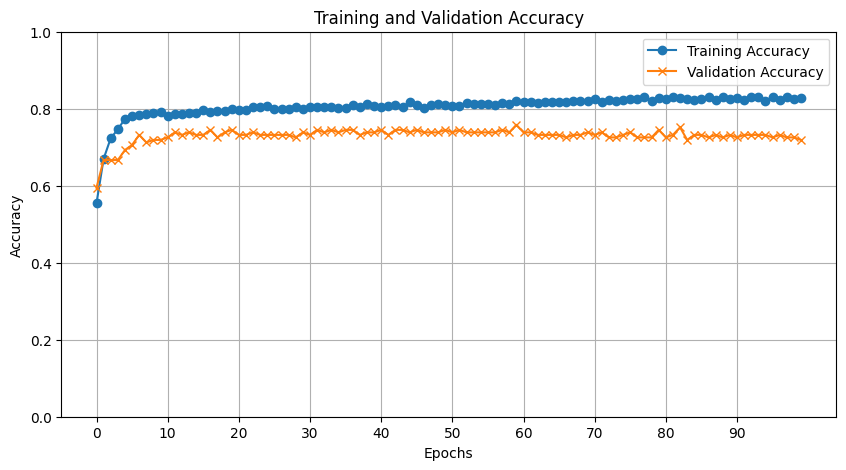

In [ ]:
# Install necessary packages if not already installed
# pip install pandas numpy scikit-learn

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Preprocess the data
# Separate features and target variable
X = data.drop('Outcome', axis=1).values  # Features
y = data['Outcome'].values                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 4: Train the model
model.fit(X_train, y_train)

# Step 5: Evaluate the model
accuracy = model.score(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 6: Make predictions
y_pred = model.predict(X_test)

# Step 7: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Step 8: Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 9: Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 100, step=10))  # Adjust x-ticks based on the number of epochs
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.grid()
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6684 - loss: 0.9040 - val_accuracy: 0.5968 - val_loss: 0.9466
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6811 - loss: 0.8277 - val_accuracy: 0.6129 - val_loss: 0.8566
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7403 - loss: 0.7440 - val_accuracy: 0.6935 - val_loss: 0.7984
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7307 - loss: 0.7313 - val_accuracy: 0.6452 - val_loss: 0.7442
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7396 - loss: 0.6953 - val_accuracy: 0.6613 - val_loss: 0.7103
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7562 - loss: 0.6590 - val_accuracy: 0.7258 - val_loss: 0.6803
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7824 - loss: 0.6184 - val_accuracy: 0.6774 - val_loss: 0.6581
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7867 - loss: 0.6277 - val_accuracy: 0.6935 - val_loss: 0.6

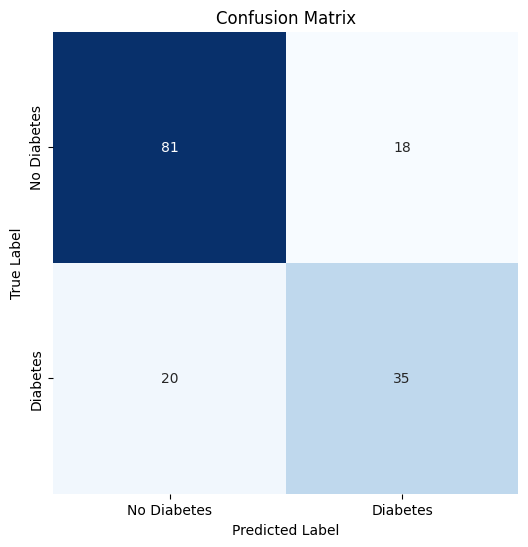

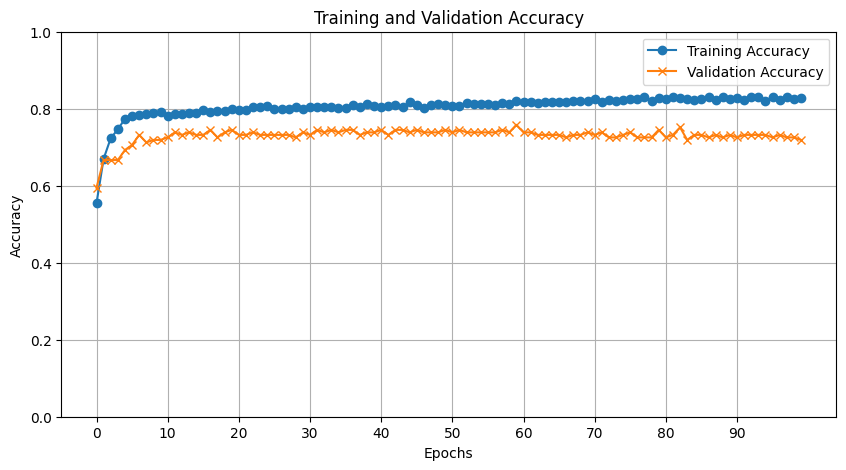

In [ ]:
# Install necessary packages if not already installed
# pip install pandas numpy scikit-learn tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Preprocess the data
# Separate features and target variable
X = data.drop('Outcome', axis=1).values  # Features
y = data['Outcome'].values                # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Build the Neural Network model
model = keras.Sequential([
        layers.Dense(16, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
        layers.Dense(8, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.1)

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Step 6: Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 7: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Step 8: Plot the Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 9: Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='x')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 100, step=10))  # Adjust x-ticks based on the number of epochs
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training on fold 1...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7468 - loss: 0.5788 
Validation Accuracy for fold 1: 72.08%

Training on fold 2...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7576 - loss: 0.6105 
Validation Accuracy for fold 2: 77.27%

Training on fold 3...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6912 - loss: 0.5960 
Validation Accuracy for fold 3: 73.38%

Training on fold 4...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7258 - loss: 0.4792 
Validation Accuracy for fold 4: 71.90%

Training on fold 5...
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7054 - loss: 0.4760 
Validation Accuracy for fold 5: 71.90%

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7863 - loss: 0.4161 
Final Accuracy on the entire dataset: 81.38%
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Confusion Matrix:
[[431  69]
 [ 74 194]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.85      0.86      0.86       5

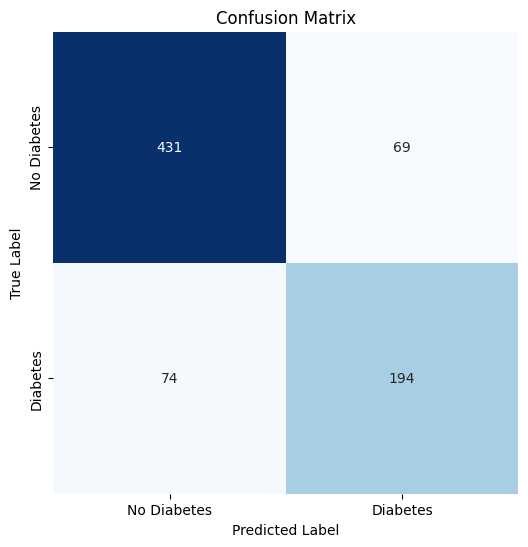

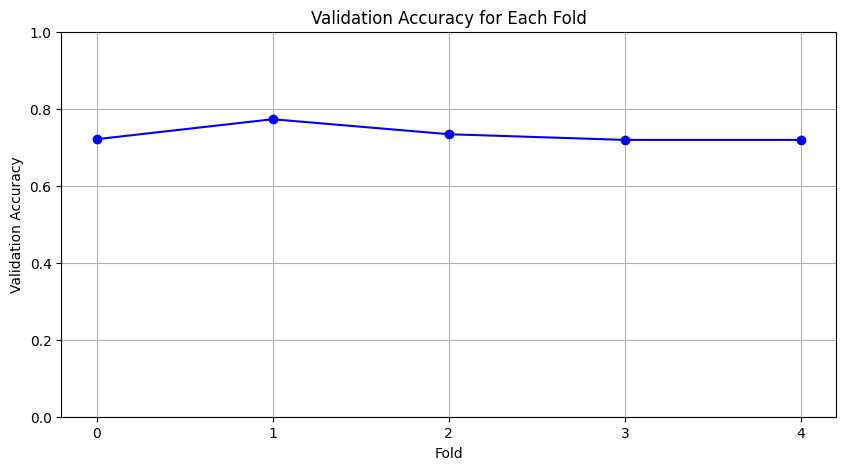

In [ ]:
# Install necessary packages if not already installed
# pip install pandas numpy scikit-learn tensorflow

import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Preprocess the data
# Separate features and target variable
X = data.drop('Outcome', axis=1).values  # Features
y = data['Outcome'].values                # Target variable

# Normalize the feature data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Initialize lists to store accuracy and loss values for each fold
fold_accuracies = []

# Step 3: K-Fold Cross-Validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

fold_no = 1
for train_idx, val_idx in kfold.split(X):
    # Split the data
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    # Step 4: Build the Neural Network model
    model = keras.Sequential([
        layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Hidden layer 1
        layers.Dense(8, activation='relu'),                                     # Hidden layer 2
        layers.Dense(1, activation='sigmoid')                                   # Output layer
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Step 5: Train the model
    print(f'Training on fold {fold_no}...')
    history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_val, y_val), verbose=0)

    # Capture the last validation accuracy for this fold
    fold_accuracies.append(history.history['val_accuracy'][-1])

    # Step 6: Evaluate the model on validation set
    val_loss, val_accuracy = model.evaluate(X_val, y_val)
    print(f'Validation Accuracy for fold {fold_no}: {val_accuracy * 100:.2f}%\n')

    fold_no += 1

# Final Evaluation on the whole dataset (optional)
final_loss, final_accuracy = model.evaluate(X, y)
print(f'Final Accuracy on the entire dataset: {final_accuracy * 100:.2f}%')

# Step 7: Make predictions using the last trained model
y_pred = model.predict(X)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary output

# Step 8: Confusion Matrix and Classification Report
cm = confusion_matrix(y, y_pred)
print("Confusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Step 9: Plot the Confusion Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Step 10: Plot Accuracy Matrix (Validation Accuracy Across Folds)
plt.figure(figsize=(10, 5))
plt.plot(fold_accuracies, marker='o', linestyle='-', color='b')
plt.title('Validation Accuracy for Each Fold')
plt.xlabel('Fold')
plt.ylabel('Validation Accuracy')
plt.xticks(np.arange(0, len(fold_accuracies), step=1))
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for better visualization
plt.grid()
plt.show()


Accuracy: 0.83
Precision: 0.72
F1-Score: 0.74
ROC AUC: 0.86

Confusion Matrix:
[[112  18]
 [ 15  47]]

Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.88      0.86      0.87       130
    Diabetes       0.72      0.76      0.74        62

    accuracy                           0.83       192
   macro avg       0.80      0.81      0.81       192
weighted avg       0.83      0.83      0.83       192



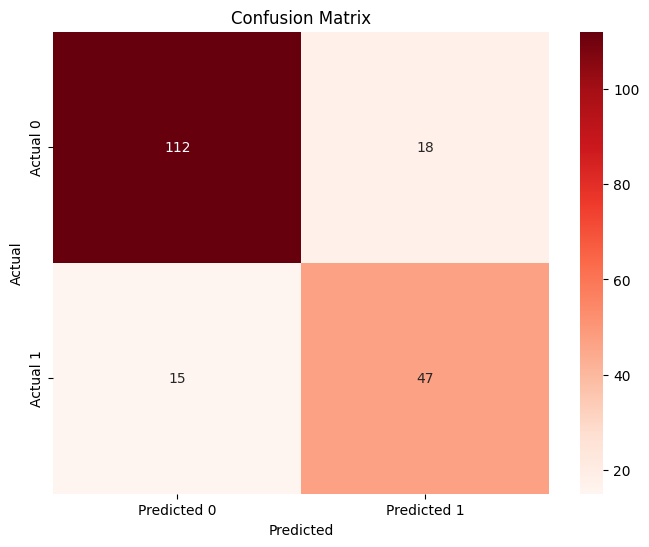

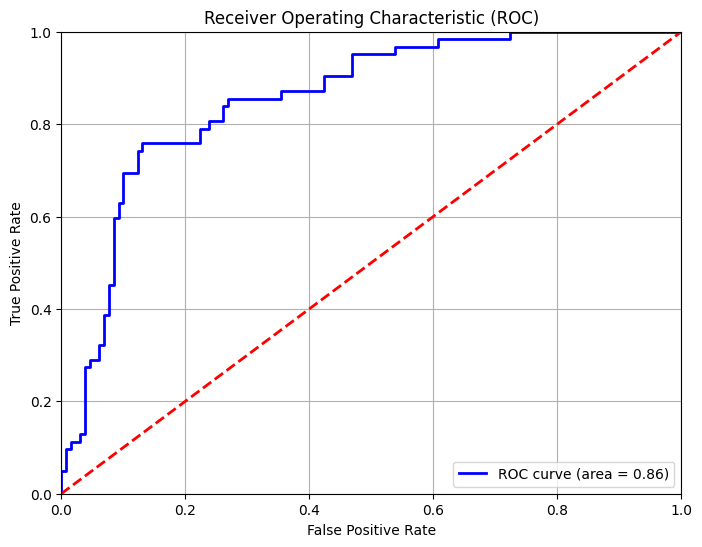

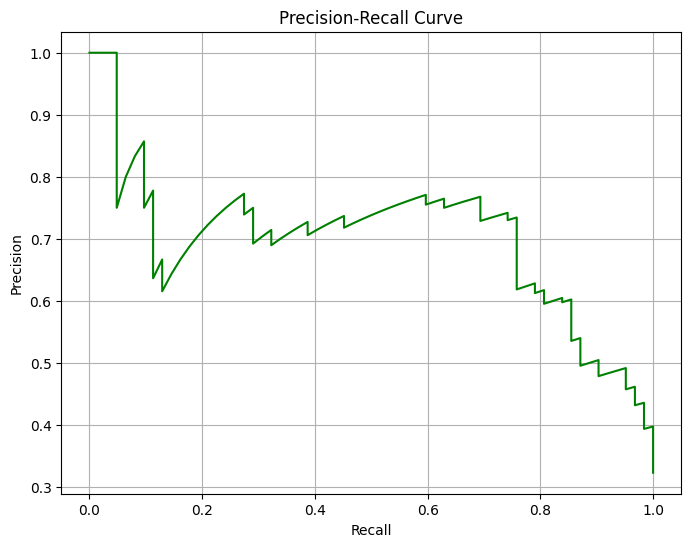

Feature ranking:
1. Glucose (0.2713)
2. BMI (0.1722)
3. Age (0.1689)
4. DiabetesPedigreeFunction (0.1069)
5. Pregnancies (0.0841)
6. BloodPressure (0.0743)
7. SkinThickness (0.0613)
8. Insulin (0.0611)


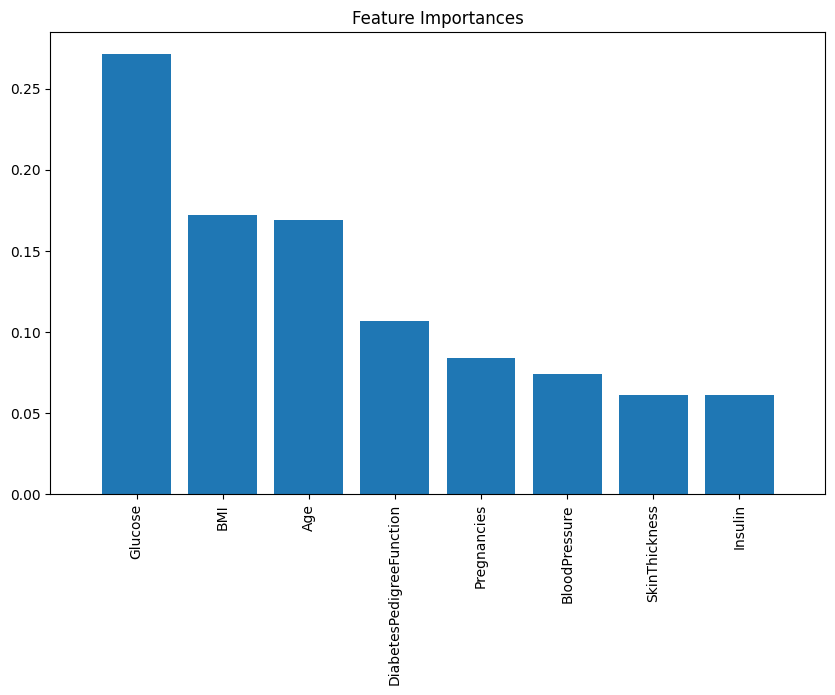

In [ ]:
# Install necessary packages if not already installed
# pip install pandas numpy scikit-learn tensorflow imbalanced-learn seaborn matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score,
                             precision_score, f1_score, roc_auc_score, roc_curve,
                             precision_recall_curve)
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# Step 1: Load the dataset
data = pd.read_csv('diabetes.csv')

# Step 2: Data Cleaning
# Replace missing values with the median for each column
data.fillna(data.median(), inplace=True)

# Step 3: Preprocess the data
# Separate features and target variable
X = data.drop('Outcome', axis=1).values  # Features
y = data['Outcome'].values                # Target variable

# Split the dataset into training and testing sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Handle imbalanced dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Normalize the feature data
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

# Step 4: Create an instance of the RandomForestClassifier with hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Step 5: Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train_res, y_train_res)

# Get the best model from grid search
best_rf_model = grid_search.best_estimator_

# Step 6: Make predictions using the best model
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]  # Predicted probabilities

# Step 7: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_prob)

# Step 8: Display results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

# Step 9: Confusion Matrix and Classification Report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Step 10: Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



# Step 11: ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Step 12: Precision-Recall Curve
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()


# Step 13: Feature Importances
importances = best_rf_model.feature_importances_
feature_names = data.columns[:-1]  # Exclude the target variable
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. {feature_names[indices[f]]} ({importances[indices[f]]:.4f})")

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()
